In [1]:
import pandas as pd

df_vnx = pd.read_excel(r'D:\Downloads\DSTC vòng 3\cleaned data\VNINDEX_cleaned.xlsx')
df_vnx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218990 entries, 0 to 218989
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       218990 non-null  int64  
 1   ticker           218990 non-null  object 
 2   timestamp        218990 non-null  object 
 3   open             218990 non-null  float64
 4   high             218990 non-null  float64
 5   low              218990 non-null  float64
 6   close            218990 non-null  float64
 7   volume           218990 non-null  int64  
 8   ema_50           218990 non-null  float64
 9   ema_200          218990 non-null  float64
 10  macd             218990 non-null  float64
 11  macd_signal      218990 non-null  float64
 12  macd_diff        218990 non-null  float64
 13  rsi              218990 non-null  float64
 14  bollinger_hband  218990 non-null  float64
 15  bollinger_lband  218990 non-null  float64
 16  mfi              218990 non-null  floa

In [2]:
df_vnx.drop("Unnamed: 0", axis =1, inplace = True)


In [3]:
df_vnx['min_price_in_future'] = df_vnx.groupby('ticker')['low'].shift(-10).rolling(window=10).min()
df_vnx['future_max_drawdown'] = (df_vnx['min_price_in_future'] / df_vnx['close']) - 1
df_vnx.dropna(subset=['future_max_drawdown'], inplace=True)


df_vnx['T2_drawdown'] = df_vnx.groupby('timestamp')['future_max_drawdown'].transform(lambda x: x.quantile(0.25))


In [4]:
print(df_vnx['future_max_drawdown'].describe(percentiles=[0.1, 0.25,0.3, 0.5, 0.7, 0.75, 0.9]))

count    214088.000000
mean         -0.057183
std           0.062751
min          -0.546243
10%          -0.137931
25%          -0.074675
30%          -0.065753
50%          -0.037530
70%          -0.019553
75%          -0.015773
90%          -0.004587
max           0.143678
Name: future_max_drawdown, dtype: float64


In [5]:
import numpy as np

# conditions = [
#     df_vnx['future_max_drawdown'] <= df_vnx['T1_drawdown'], 
#     (df_vnx['future_max_drawdown'] > df_vnx['T1_drawdown']) & (df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown']), 
#     df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
# ]

# labels = [2,1,0] 


conditions = [
    df_vnx['future_max_drawdown'] <= df_vnx['T2_drawdown'],  
    df_vnx['future_max_drawdown'] > df_vnx['T2_drawdown'] 
]


labels = [1,0] 
df_vnx['risk_label'] = np.select(conditions, labels)

df_vnx.head()

,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,golden_cross,death_cross,return,macd_cross,bollinger_pct,bollinger_bw,min_price_in_future,future_max_drawdown,T2_drawdown,risk_label
9,AAA,2022-04-07 00:00,17477.460,17765.55,16805.250,16805.250,9718900,17688.661015,17688.661015,101.332492,...,0,0,-0.046322,-1,0.237787,0.149198,12771.990,-0.240000,-0.274330,0
10,AAA,2022-04-08 00:00,16997.310,17189.37,16805.250,16805.250,4876600,17654.017445,17654.017445,25.081806,...,0,0,0.000000,0,0.244805,0.151232,12339.855,-0.265714,-0.269189,0
11,AAA,2022-04-12 00:00,16853.265,17093.34,15988.995,15988.995,5456300,17588.722447,17588.722447,-100.058951,...,0,0,-0.048571,0,0.010391,0.168281,11715.660,-0.267267,-0.273586,0
12,AAA,2022-04-13 00:00,16037.010,16613.19,16037.010,16613.190,3694500,17550.466273,17550.466273,-147.170097,...,0,0,0.039039,0,0.219458,0.166934,11715.660,-0.294798,-0.293694,1
13,AAA,2022-04-14 00:00,16805.250,16901.28,16421.130,16517.160,2398600,17509.944458,17509.944458,-190.063900,...,0,0,-0.005780,0,0.192412,0.168894,11715.660,-0.290698,-0.288379,1


In [6]:
df_vnx.dropna(axis = 0, how = 'any', inplace = True)
df_vnx.tail()

,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,golden_cross,death_cross,return,macd_cross,bollinger_pct,bollinger_bw,min_price_in_future,future_max_drawdown,T2_drawdown,risk_label
218975,YEG,2025-08-21 00:00,15300.0,15350.0,14850.0,14850.0,4251005,13829.703239,12720.669942,590.179487,...,0,0,-0.023026,-1,0.552990,0.247845,13550.0,-0.087542,-0.077309,1
218976,YEG,2025-08-22 00:00,14600.0,14800.0,13850.0,13850.0,10601230,13830.499190,12731.907057,450.694333,...,0,0,-0.067340,0,0.278930,0.248473,13550.0,-0.021661,-0.051564,0
218977,YEG,2025-08-25 00:00,14000.0,14150.0,13550.0,13550.0,2886294,13819.499222,12740.047285,312.343351,...,0,0,-0.021661,0,0.208270,0.254130,13500.0,-0.003690,-0.025721,0
218978,YEG,2025-08-26 00:00,13550.0,14200.0,13550.0,14200.0,1986953,13834.420821,12754.574178,252.241091,...,0,0,0.047970,0,0.355824,0.233638,13500.0,-0.049296,-0.057971,0
218979,YEG,2025-08-27 00:00,14200.0,14300.0,13950.0,14000.0,2561072,13840.914122,12766.966474,186.323467,...,0,0,-0.014085,0,0.251672,0.206054,13500.0,-0.035714,-0.060510,0


In [7]:
df_vnx["risk_label"].value_counts()

risk_label
0    160128
1     53960
Name: count, dtype: int64

In [8]:
df = df_vnx
df.reset_index(inplace = True)
df.drop("index", axis =1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214088 entries, 0 to 214087
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ticker               214088 non-null  object 
 1   timestamp            214088 non-null  object 
 2   open                 214088 non-null  float64
 3   high                 214088 non-null  float64
 4   low                  214088 non-null  float64
 5   close                214088 non-null  float64
 6   volume               214088 non-null  int64  
 7   ema_50               214088 non-null  float64
 8   ema_200              214088 non-null  float64
 9   macd                 214088 non-null  float64
 10  macd_signal          214088 non-null  float64
 11  macd_diff            214088 non-null  float64
 12  rsi                  214088 non-null  float64
 13  bollinger_hband      214088 non-null  float64
 14  bollinger_lband      214088 non-null  float64
 15  mfi              

In [9]:
import numpy as np
import pandas as pd

def add_features(df):
    df = df.copy()

    df["volatility_5d"] = df.groupby("ticker")["return"].rolling(5).std().reset_index(0, drop=True)
    df["volatility_10d"] = df.groupby("ticker")["return"].rolling(10).std().reset_index(0, drop=True)

    df["volume_change"] = df.groupby("ticker")["volume"].pct_change()
    
    df["obv"] = (np.sign(df["return"].fillna(0)) * df["volume"]).groupby(df["ticker"]).cumsum()
    
    df["volume_pct_20d"] = df.groupby("ticker")["volume"].transform(
        lambda x: x.rolling(20).apply(lambda s: pd.Series(s).rank(pct=True).iloc[-1])
    )

    lag_cols = ["close", "return", "rsi", "macd", "macd_diff", "bollinger_pct"]
    for col in lag_cols:
        for lag in [1, 2, 3]:
            df[f"{col}_lag{lag}"] = df.groupby("ticker")[col].shift(lag)
    
    return df

df = add_features(df)


df.dropna(inplace=True)

print("Số feature sau khi thêm:", df.shape[1])
df.head()


Số feature sau khi thêm: 49


,ticker,timestamp,open,high,low,close,volume,ema_50,ema_200,macd,...,rsi_lag3,macd_lag1,macd_lag2,macd_lag3,macd_diff_lag1,macd_diff_lag2,macd_diff_lag3,bollinger_pct_lag1,bollinger_pct_lag2,bollinger_pct_lag3
19,AAA,2022-05-09 00:00,12099.780,12291.840,11523.600,11523.600,5787100,15568.152999,15568.152999,-1232.382981,...,33.113936,-1163.180540,-1141.043670,-1149.968776,-97.961385,-100.314862,-134.318683,0.196362,0.244514,0.271673
20,AAA,2022-05-10 00:00,10995.435,11715.660,10851.390,11715.660,4334400,15417.074842,15417.074842,-1257.236142,...,30.865812,-1232.382981,-1163.180540,-1141.043670,-133.731062,-97.961385,-100.314862,0.112485,0.196362,0.244514
21,AAA,2022-05-11 00:00,11715.660,12003.750,11715.660,11907.720,2619900,15279.453083,15279.453083,-1247.059489,...,28.046308,-1257.236142,-1232.382981,-1163.180540,-126.867378,-133.731062,-97.961385,0.171396,0.112485,0.196362
22,AAA,2022-05-12 00:00,11763.675,11859.705,11091.465,11091.465,3658800,15115.218257,15115.218257,-1289.989182,...,24.345071,-1247.059489,-1257.236142,-1232.382981,-93.352580,-126.867378,-133.731062,0.222476,0.171396,0.112485
23,AAA,2022-05-13 00:00,11091.465,11283.525,10323.225,10323.225,7024900,14927.296952,14927.296952,-1370.206929,...,26.793113,-1289.989182,-1247.059489,-1257.236142,-109.025819,-93.352580,-126.867378,0.131271,0.222476,0.171396


In [10]:
df.columns

Index(['ticker', 'timestamp', 'open', 'high', 'low', 'close', 'volume',
       'ema_50', 'ema_200', 'macd', 'macd_signal', 'macd_diff', 'rsi',
       'bollinger_hband', 'bollinger_lband', 'mfi', 'golden_cross',
       'death_cross', 'return', 'macd_cross', 'bollinger_pct', 'bollinger_bw',
       'min_price_in_future', 'future_max_drawdown', 'T2_drawdown',
       'risk_label', 'volatility_5d', 'volatility_10d', 'volume_change', 'obv',
       'volume_pct_20d', 'close_lag1', 'close_lag2', 'close_lag3',
       'return_lag1', 'return_lag2', 'return_lag3', 'rsi_lag1', 'rsi_lag2',
       'rsi_lag3', 'macd_lag1', 'macd_lag2', 'macd_lag3', 'macd_diff_lag1',
       'macd_diff_lag2', 'macd_diff_lag3', 'bollinger_pct_lag1',
       'bollinger_pct_lag2', 'bollinger_pct_lag3'],
      dtype='object')

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import torch
import torch.nn as nn
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Features = [
       'open', 'high', 'low', 'close', 'volume',
       'ema_50', 'ema_200', 'macd', 'macd_signal', 'macd_diff', 'rsi',
       'bollinger_hband', 'bollinger_lband', 'mfi',
       'return', 'bollinger_pct', 'bollinger_bw',
       'volatility_5d', 'volatility_10d',
       'volume_change', 'obv', 'volume_pct_20d', 'close_lag1', 'close_lag2',
       'close_lag3', 'return_lag1', 'return_lag2', 'return_lag3', 'rsi_lag1',
       'rsi_lag2', 'rsi_lag3', 'macd_lag1', 'macd_lag2', 'macd_lag3',
       'macd_diff_lag1', 'macd_diff_lag2', 'macd_diff_lag3',
       'bollinger_pct_lag1', 'bollinger_pct_lag2', 'bollinger_pct_lag3'
]


# Features = [
#        'open', 'high', 'low', 'close', 'volume',
#        'ema_50', 'ema_200', 'macd', 'macd_signal', 'rsi',
#        'bollinger_hband', 'bollinger_lband', 'mfi', 'return', 'bollinger_pct', 'bollinger_bw'
#        ]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
import lightgbm as lgb

test_size = 0.2
random_state = 42
all_Xtrain_dfs = []
all_ytrain_dfs = []
all_Xtest_dfs = []
all_ytest_dfs = []

for ticker in df["ticker"].unique():
    df_ticker = df[df["ticker"] == ticker].copy()
    df_ticker.sort_values(by = "timestamp", inplace = True)
    split_index = int((len(df_ticker) * (1-test_size)))
    df_ticker_train = df_ticker[:split_index]
    df_ticker_test = df_ticker[split_index:]
    all_Xtrain_dfs.append(df_ticker_train[Features])
    all_Xtest_dfs.append(df_ticker_test[Features])
    all_ytrain_dfs.append(df_ticker_train["risk_label"])
    all_ytest_dfs.append(df_ticker_test["risk_label"])


X_train = pd.concat(all_Xtrain_dfs)
X_test = pd.concat(all_Xtest_dfs)
y_train = pd.concat(all_ytrain_dfs)
y_test = pd.concat(all_ytest_dfs)

print(f"Kích thước tập Train: X={X_train.shape}, y={y_train.shape}")
print(f"Kích thước tập Test: X={X_test.shape}, y={y_test.shape}")



Kích thước tập Train: X=(167157, 40), y=(167157,)
Kích thước tập Test: X=(42029, 40), y=(42029,)


In [13]:
!pip install imblearn

In [14]:

# from imblearn.combine import SMOTEENN

# smote_enn = SMOTEENN(random_state=42)
# X_train_smote, y_train_smote = smote_enn.fit_resample(X_train, y_train)


# print(f"\nKích thước tập Train SAU KHI SMOTE: X={X_train_smote.shape}, y={y_train_smote.shape}")
# print("\nPhân bổ lớp trên tập Train SAU KHI SMOTE:")
# print(y_train_smote.value_counts(normalize=True))

[LightGBM] [Info] Number of positive: 42135, number of negative: 125022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9984
[LightGBM] [Info] Number of data points in the train set: 167157, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252068 -> initscore=-1.087611
[LightGBM] [Info] Start training from score -1.087611
              precision    recall  f1-score   support

           0     0.7854    0.8714    0.8262     31439
           1     0.4342    0.2930    0.3499     10590

    accuracy                         0.7257     42029
   macro avg     0.6098    0.5822    0.5880     42029
weighted avg     0.6969    0.7257    0.7062     42029



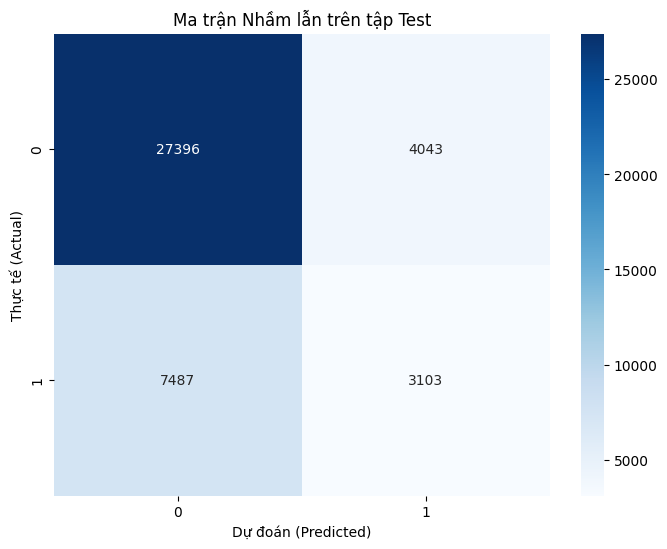

In [15]:
import lightgbm as lgb
from collections import Counter
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

lgbm_classifier = lgb.LGBMClassifier(random_state=42, is_unbalance=True)
# counter = Counter(y_train)
# neg_count = counter[0]
# pos_count = counter[1]


# scale_pos_weight_value = neg_count / pos_count

# print(f"Số mẫu lớp 0 (Không rủi ro cao): {neg_count}")
# print(f"Số mẫu lớp 1 (Rủi ro cao): {pos_count}")
# print(f"Giá trị scale_pos_weight được tính toán: {scale_pos_weight_value:.4f}")


lgbm_classifier_scaled = lgb.LGBMClassifier(random_state=42)


lgbm_classifier_scaled.fit(X_train, y_train)

model_filename = 'lgbm_model_vnx.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lgbm_classifier_scaled, file)

y_pred_proba = lgbm_classifier_scaled.predict_proba(X_test)[:, 1]
y_pred_scaled = (y_pred_proba > 0.4).astype(int)


print(classification_report(y_test, y_pred_scaled, digits=4))
cm = confusion_matrix(y_test, y_pred_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Ma trận Nhầm lẫn trên tập Test')
plt.show()